In [1]:
# libraries to import
import sys
sys.path.append('../utils/')
from helper_functions import *
from helper_plots import *
from vector_distance_metrics import *

from linear_ucb_simulation import *

import numpy as np
np.random.seed(70)

# Stochastic Linear Bandits

# Strategy 1: UCB Algorithm

The difference here is that instead of having confidence intervals, we have confidence ellipsoids.

The goal of the algorithm is to optimize the selection of actions (arms) in order to maximize the cumulative reward received over a series of rounds.

The key idea behind the algorithm is to model the relationship between the observed rewards and the features of each arm using linear regression, and then use the estimated regression coefficients to make informed decisions about which arm to select in each round.

#### Initial setup

In [2]:
# Setting up parameters for the runs
n_arms = 10
n_features = 10

n_rounds = 700
noise = 0.1  
lambda_param = 0.5

n_simulations = 100

## Varying the number of items

In [3]:
# list of arms numbers we want to test
n_arms_list = [10, 20, 50, 100]

In [4]:
results_list = run_lin_ucb_average_multiple_arms(n_simulations, n_arms_list, n_features, n_rounds, noise, lambda_param, True)

## Varying the number of arms when beta is fixed

### Regret for number of arms variations

In the plot below we see the cumulative regret for different variations of the number of arms over 50 simulated rounds.
we see that as the number of arms increases, the cumulative regret curve flattens out at a higher level. This is because the algorithm spends more time exploring to find the best arm as the number of arms increases.
We also see that as the number of arms increases, the gap between the flat part reduces. 

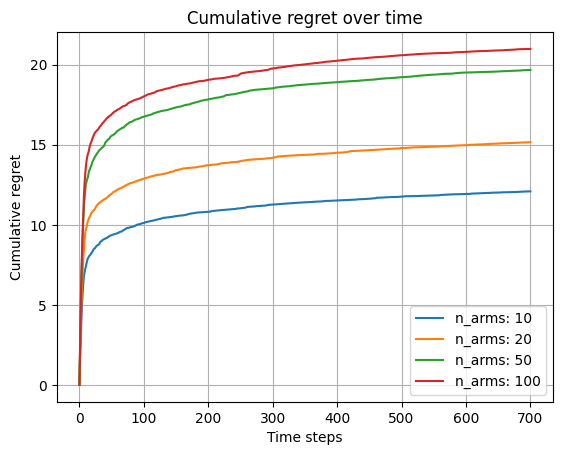

In [5]:
# Plotting the cumulative regret for different arm
plot_multiple_lines([result[0] for result in results_list], list_of_labels_from_values_list(n_arms_list, "n_arms: "), "Cumulative regret over time", "Time steps", "Cumulative regret")

### Difference between the true theta and estimated theta for number of arms variations

In the plot below we see the difference between the true theta and estimated theta for different variations of the number of arms over 50 simulated rounds.
The trend we see is that as we increase the number of arms, the absolute difference between the true theta and the estimated theta decreases. This can be explained by the fact that when we have fewer arms, the likelihood of finding an arm whose feature vector is as close as possible to the true theta vector is lower than when we have more arms.

An interesting point is that setting the beta parameter to a constant makes it so that we always pick the same optimal arm and therefore end up with a theta estimate that is that is further away than if we chose a beta parameter that is increasing logarithmically.

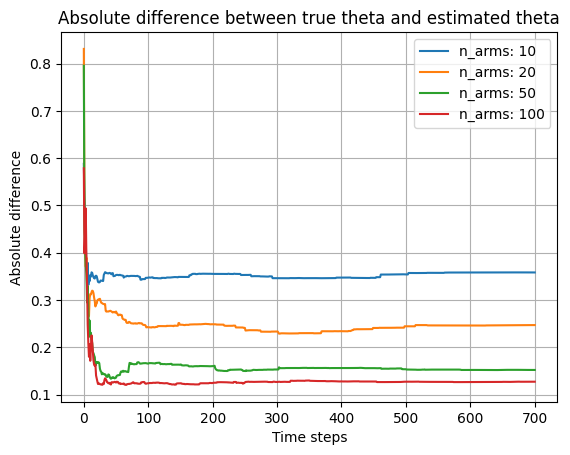

In [6]:
diff_for_arm_variation = [theta_hat_true_theta_distance(result[1], result[2], calculate_absolute_difference) for result in results_list]

# Plotting the difference between the true theta and the estimate theta_hat
plot_multiple_lines(diff_for_arm_variation, list_of_labels_from_values_list(n_arms_list, "n_arms: "), "Absolute difference between true theta and estimated theta", "Time steps", "Absolute difference")

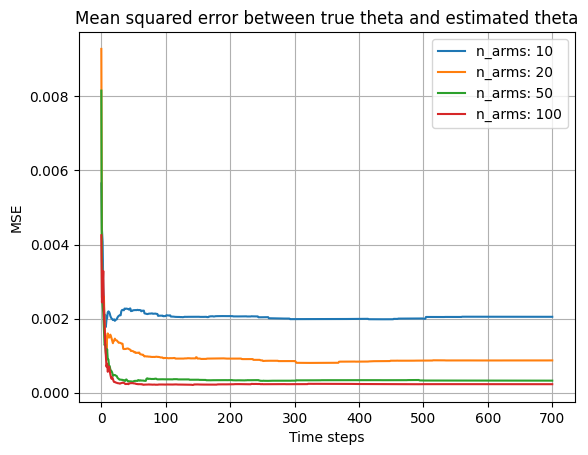

In [7]:
diff_for_arm_variation = [theta_hat_true_theta_distance(result[1], result[2], calculate_mse) for result in results_list]

# Plotting the difference between the true theta and the estimate theta_hat 
plot_multiple_lines(diff_for_arm_variation, list_of_labels_from_values_list(n_arms_list, "n_arms: "), "Mean squared error between true theta and estimated theta", "Time steps", "MSE")

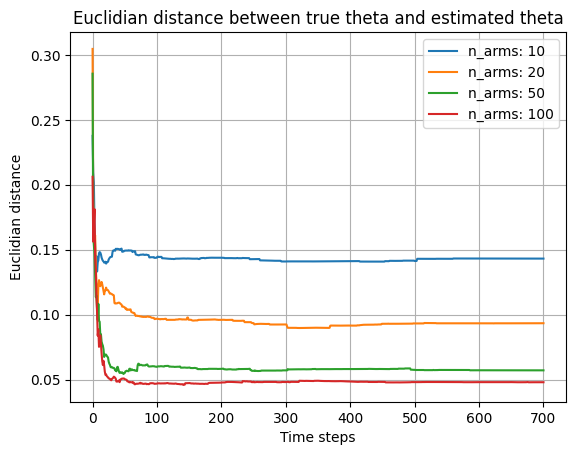

In [8]:
diff_for_arm_variation = [theta_hat_true_theta_distance(result[1], result[2], calculate_euclidean_distance) for result in results_list]

# Plotting the difference between the true theta and the estimate theta_hat
plot_multiple_lines(diff_for_arm_variation, list_of_labels_from_values_list(n_arms_list, "n_arms: "), "Euclidian distance between true theta and estimated theta", "Time steps", "Euclidian distance")

## Varying the number of items - with beta increasing logarithmically

In [9]:
results_list = run_lin_ucb_average_multiple_arms(n_simulations, n_arms_list, n_features, n_rounds, noise, lambda_param, False)

### Regret for number of arms variations
In the plot below we see the cumulative regret for different variations of the number of arms over 50 simulated rounds.
we see that as the number of arms increases, the cumulative regret curve is situated at a higher level. This is because as the number of arms increases, the algorithm spends more time exploring to find the best arm.
We also see that as the number of arms increases, the gap between the flat part reduces.

Compared to the case where beta is fixed, when beta is set to a logarithmic function, the value of beta increases logarithmically with the number of rounds, which means that the algorithm can maintain a balance between exploration and exploitation over a longer period. This allows the algorithm to gradually shift from exploration to exploitation as more data is collected, resulting in better performance over the long run.

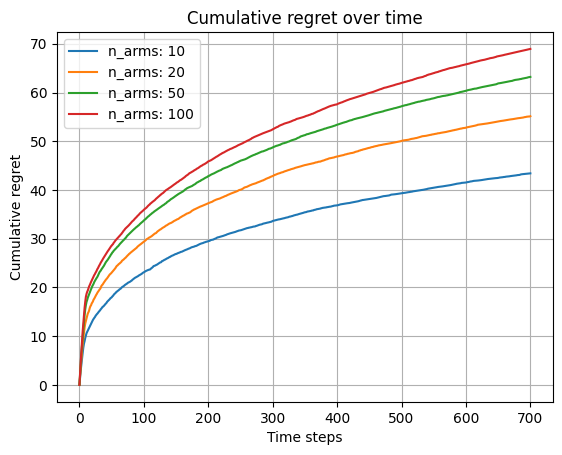

In [10]:
# Plotting the cumulative regret for different arm
plot_multiple_lines([result[0] for result in results_list], list_of_labels_from_values_list(n_arms_list, "n_arms: "), "Cumulative regret over time", "Time steps", "Cumulative regret")

### Difference between the true theta and estimated theta for number of arms variations

In the plot below we see the difference between the true theta and estimated theta for different variations of the number of arms over 50 simulated rounds.
The trend we see is that as we increase the number of arms, the absolute difference between the true theta and the estimated theta decreases. This can be explained by the fact that when we have less arms, the likelihood of finding an arm whose feature vector is as close as possible to the true theta vector is lower than when we have more arms.

An interesting point, the fact that we set the beta parameter to a logarithmic function, it allows to maintain some level of exploration over a longer period. This is why by continuously not picking the optimal arm, we end up with a better approximation of the theta feature vector.

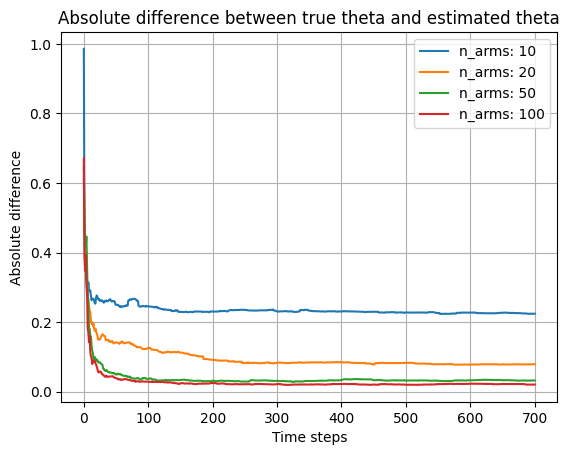

In [11]:
diff_for_arm_variation = [theta_hat_true_theta_distance(result[1], result[2], calculate_absolute_difference) for result in results_list]

# Plotting the difference between the true theta and the estimate theta_hat 
plot_multiple_lines(diff_for_arm_variation, list_of_labels_from_values_list(n_arms_list, "n_arms: "), "Absolute difference between true theta and estimated theta", "Time steps", "Absolute difference")

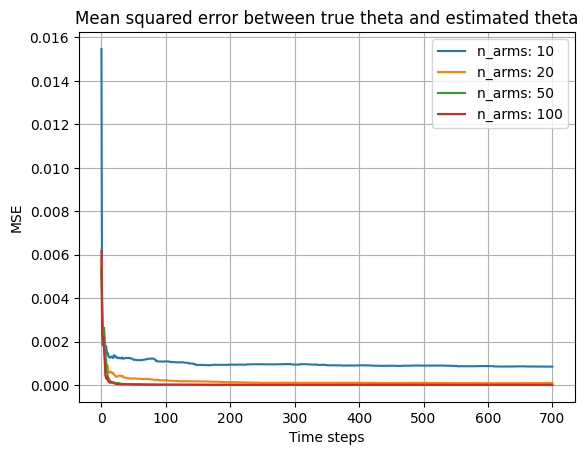

In [12]:
diff_for_arm_variation = [theta_hat_true_theta_distance(result[1], result[2], calculate_mse) for result in results_list]

# Plotting the difference between the true theta and the estimate theta_hat 
plot_multiple_lines(diff_for_arm_variation, list_of_labels_from_values_list(n_arms_list, "n_arms: "), "Mean squared error between true theta and estimated theta", "Time steps", "MSE")

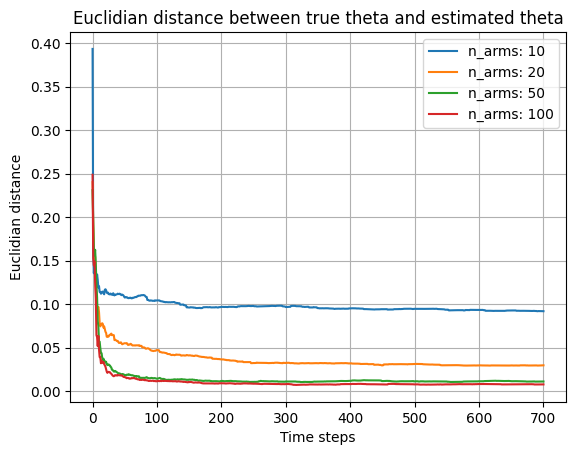

In [13]:
diff_for_arm_variation = [theta_hat_true_theta_distance(result[1], result[2], calculate_euclidean_distance) for result in results_list]

# Plotting the difference between the true theta and the estimate theta_hat
plot_multiple_lines(diff_for_arm_variation, list_of_labels_from_values_list(n_arms_list, "n_arms: "), "Euclidian distance between true theta and estimated theta", "Time steps", "Euclidian distance")

## Varying the number of features

In [14]:
# Setting up parameters for the runs
n_arms = 10

# list of feature numbers we want to test
n_features_list = [2, 5, 10, 20, 50]

In [15]:
results_list = run_lin_ucb_average_multiple_features(n_simulations, n_arms, n_features_list, n_rounds, noise, lambda_param, True)

## Varying the number of features

By keeping the number of arms the same: 10 arms

### Regret for number of features variations

In the plot below we see the cumulative regret for different variations for the number of features over 50 simulated rounds. We can see that as we increase the number of features, the cumulative regrets grows. 
We can see that as we increase the number of features, the cumulative regrets grows. 
As the number of features increases, the number of possible linear combinations to estimate the optimal one also increases which makes the algorithm explore for a longer period of time.

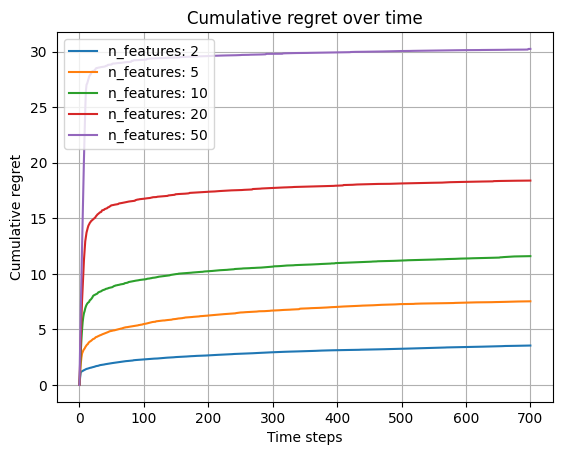

In [16]:
# Plotting the cumulative regret for different arm
plot_multiple_lines([result[0] for result in results_list], list_of_labels_from_values_list(n_features_list, "n_features: "), "Cumulative regret over time", "Time steps", "Cumulative regret")

### Difference between the true theta and estimated theta for the number of features variations

In the plot below we see the difference between the true theta and estimated theta for different variations of the number of features over 50 simulated rounds.

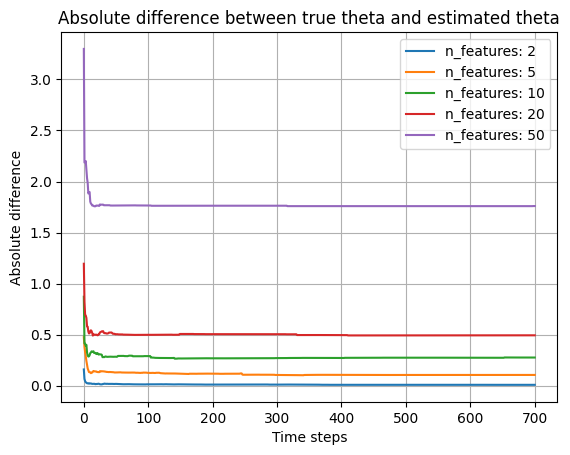

In [17]:
diff_for_arm_variation = [theta_hat_true_theta_distance(result[1], result[2], calculate_absolute_difference) for result in results_list]

# Plotting the difference between the true theta and the estimate theta_hat 
plot_multiple_lines(diff_for_arm_variation, list_of_labels_from_values_list(n_features_list, "n_features: "), "Absolute difference between true theta and estimated theta", "Time steps", "Absolute difference")

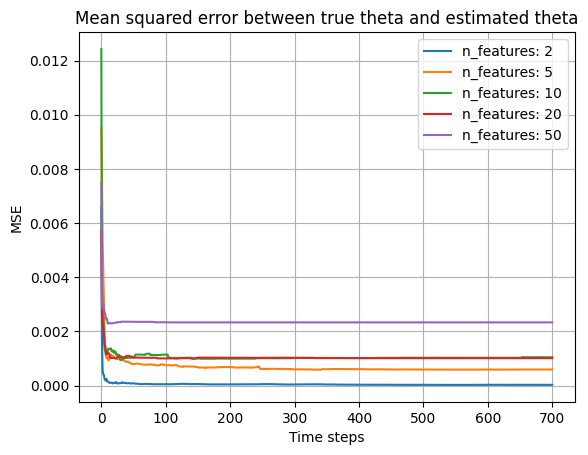

In [18]:
diff_for_arm_variation = [theta_hat_true_theta_distance(result[1], result[2], calculate_mse) for result in results_list]

# Plotting the difference between the true theta and the estimate theta_hat 
plot_multiple_lines(diff_for_arm_variation, list_of_labels_from_values_list(n_features_list, "n_features: "), "Mean squared error between true theta and estimated theta", "Time steps", "MSE")

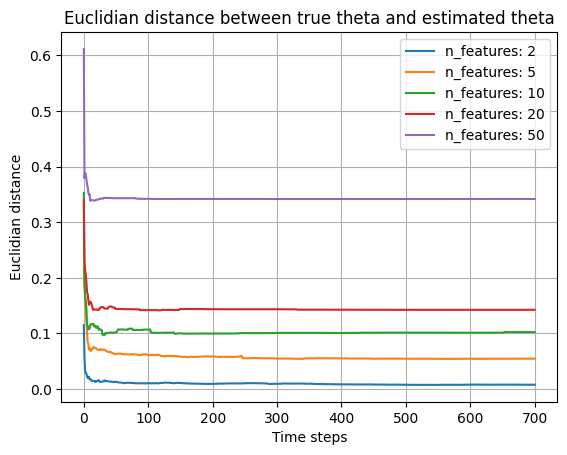

In [19]:
diff_for_arm_variation = [theta_hat_true_theta_distance(result[1], result[2], calculate_euclidean_distance) for result in results_list]

# Plotting the difference between the true theta and the estimate theta_hat 
plot_multiple_lines(diff_for_arm_variation, list_of_labels_from_values_list(n_features_list, "n_features: "), "Euclidian distance between true theta and estimated theta", "Time steps", "Euclidian distance")

## Varying the number of features when beta is increasing logarithmically

In [20]:
results_list = run_lin_ucb_average_multiple_features(n_simulations, n_arms, n_features_list, n_rounds, noise, lambda_param, False)

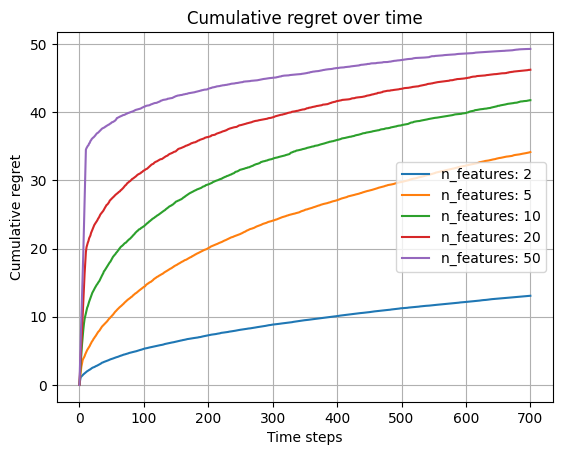

In [21]:
# Plotting the cumulative regret for different arm
plot_multiple_lines([result[0] for result in results_list], list_of_labels_from_values_list(n_features_list, "n_features: "), "Cumulative regret over time", "Time steps", "Cumulative regret")

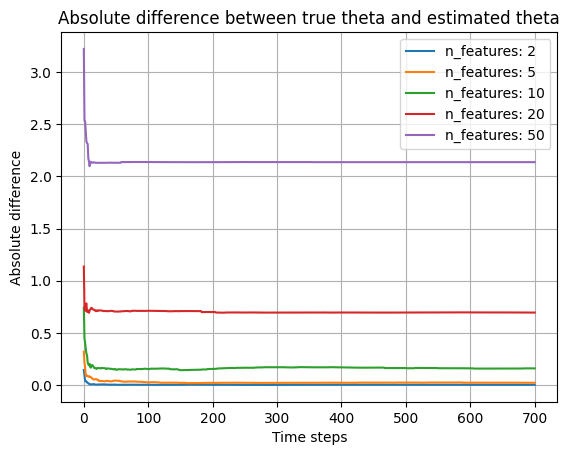

In [22]:
diff_for_arm_variation = [theta_hat_true_theta_distance(result[1], result[2], calculate_absolute_difference) for result in results_list]

# Plotting the difference between the true theta and the estimate theta_hat 
plot_multiple_lines(diff_for_arm_variation, list_of_labels_from_values_list(n_features_list, "n_features: "), "Absolute difference between true theta and estimated theta", "Time steps", "Absolute difference")

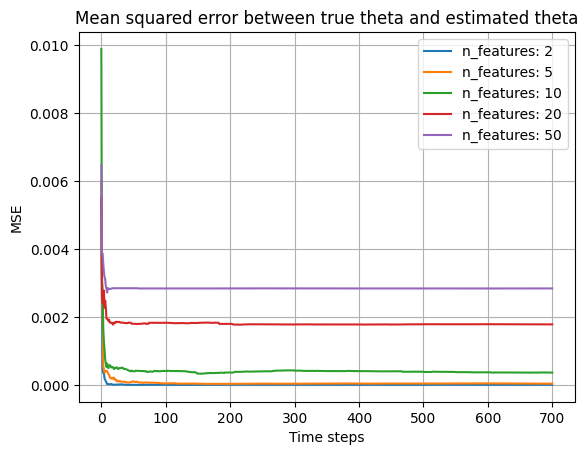

In [23]:
diff_for_arm_variation = [theta_hat_true_theta_distance(result[1], result[2], calculate_mse) for result in results_list]

# Plotting the difference between the true theta and the estimate theta_hat 
plot_multiple_lines(diff_for_arm_variation, list_of_labels_from_values_list(n_features_list, "n_features: "), "Mean squared error between true theta and estimated theta", "Time steps", "MSE")

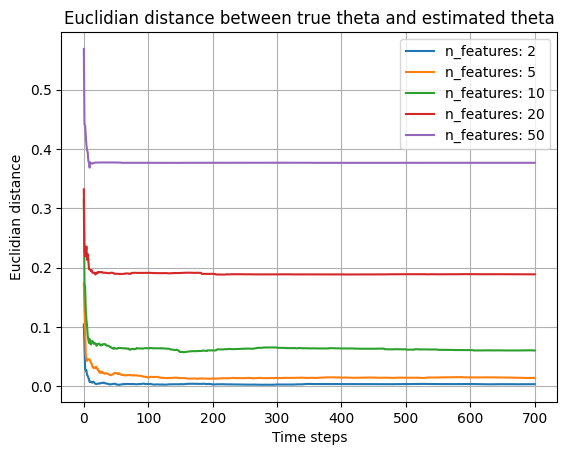

In [24]:
diff_for_arm_variation = [theta_hat_true_theta_distance(result[1], result[2], calculate_euclidean_distance) for result in results_list]

# Plotting the difference between the true theta and the estimate theta_hat 
plot_multiple_lines(diff_for_arm_variation, list_of_labels_from_values_list(n_features_list, "n_features: "), "Euclidian distance between true theta and estimated theta", "Time steps", "Euclidian distance")